Naive Bayes Accuracy: 0.98
SVM Accuracy: 0.99


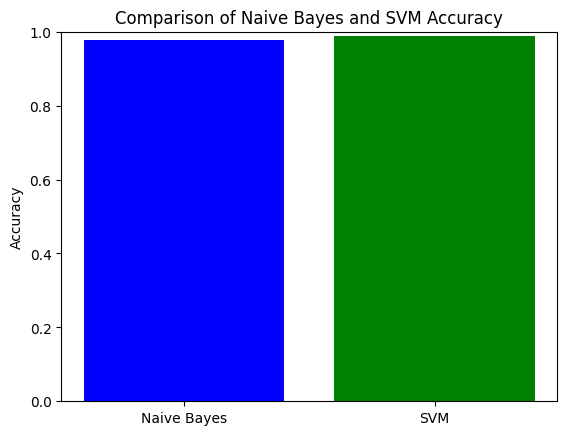

In [ ]:
# Import required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




# Step 1: Load the data
df = pd.read_csv('/content/emailmmm.csv')

# Step 2: Preprocess the text
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)


    tokens = [ps.stem(word) for word in tokens if word not in stop_words]


    return ' '.join(tokens)

# Apply preprocessing to the dataset
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Step 3: Feature Extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['spam']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict using Naive Bayes
y_nb_pred = nb_model.predict(X_test)

# Step 6: Train SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict using SVM
y_svm_pred = svm_model.predict(X_test)

# Step 7: Calculate Accuracy for Both Models

# Naive Bayes Accuracy
nb_accuracy = accuracy_score(y_test, y_nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

# SVM Accuracy
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Step 8: Plot the results

# Create a bar plot to compare the accuracy of Naive Bayes and SVM
model_names = ['Naive Bayes', 'SVM']
accuracies = [nb_accuracy, svm_accuracy]

plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.title('Comparison of Naive Bayes and SVM Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Limit the y-axis from 0 to 1 (100%)
plt.show()
